The dataset contains information on students and their marks on 3 subjects: math, reading and writing.

To pass a subject, students need a mark of at least 40 points.  
To be approved, a student needs to pass all 3 subjects.

Let's explore in more details the relationship between students marks / approval and their characteristics!

**Reading the Data set**

In [17]:
import pandas as pd

# reading the data
data = pd.read_csv('../input/students_performance_data.csv')

In [3]:
# looking at the data head

In [18]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Descriptive Statistics

In [7]:
# describing the dataset

In [19]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# lets check the no. of unique items present in the categorical column

In [21]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [11]:
# lets check the percentage of missing data in each columns present in the data

In [22]:
no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


In [10]:
# set a passing mark for the students to pass on the three subjects individually

In [23]:
passmarks = 40

In [12]:
# create a new column pass_math, this column will tell us whether the students pass or fail on math

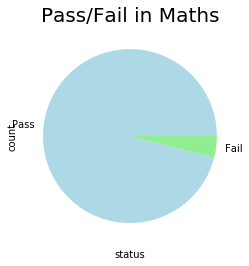

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

data['pass_math'] = np.where(data['math score']< passmarks, 'Fail', 'Pass')
data['pass_math'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'])

plt.title('Pass/Fail in Maths', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [14]:
# create a new column pass_reading, this column will tell us whether the students pass or fail on reading

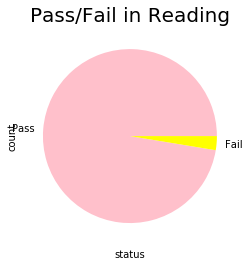

In [26]:
data['pass_reading'] = np.where(data['reading score']< passmarks, 'Fail', 'Pass')
data['pass_reading'].value_counts(dropna = False).plot.pie(colors = ['pink', 'yellow'])

plt.title('Pass/Fail in Reading', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [1]:
# create a new column pass_writing, this column will tell us whether the students are pass or fail on writing

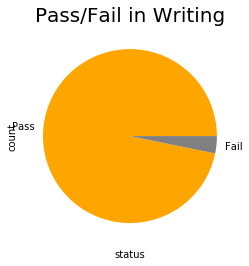

In [27]:
data['pass_writing'] = np.where(data['writing score']< passmarks, 'Fail', 'Pass')
data['pass_writing'].value_counts(dropna = False).plot.pie(colors = ['orange', 'gray'])

plt.title('Pass/Fail in Writing', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [18]:
# create a new column status, this column will tell us whether the students pass or fail overall

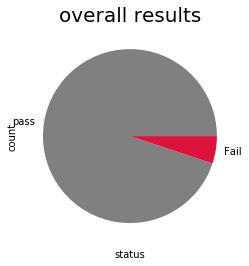

In [28]:
data['status'] = data.apply(
    lambda x : 'Fail' 
        if x['pass_math'] == 'Fail' or x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
        else 'pass', axis = 1)

data['status'].value_counts(dropna = False).plot.pie(colors = ['grey', 'crimson'])
plt.title('overall results', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

## Label Encoding

In [20]:
# create an encoder with sklearn LabelEncoder

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [22]:
# label encoding for test preparation course

In [30]:
data['test preparation course'] = le.fit_transform(data['test preparation course'])

In [24]:
# label encoding for lunch

In [31]:
data['lunch'] = le.fit_transform(data['lunch'])

In [26]:
# label encoding for race/ethnicity

In [32]:
data['race/ethnicity'] = le.fit_transform(data['race/ethnicity'])

In [28]:
# label encoding for parental level of education

In [33]:
data['parental level of education'] = le.fit_transform(data['parental level of education'])

In [30]:
#label encoding for gender

In [34]:
data['gender'] = le.fit_transform(data['gender'])

In [32]:
# label encoding for pass_math

In [35]:
data['pass_math'] = le.fit_transform(data['pass_math'])

In [34]:
# label encoding for pass_reading

In [36]:
data['pass_reading'] = le.fit_transform(data['pass_reading'])

In [36]:
# label encoding for pass_writing

In [38]:
data['pass_writing'] = le.fit_transform(data['pass_writing'])

In [38]:
# label encoding for status

In [39]:
data['status'] = le.fit_transform(data['status'])

## Save prepared data

In [41]:
# save prepared data in csv

In [40]:
data.to_csv('../output/students_performance_data_prepared.csv', index=False)

In [1]:
! jupyter nbconvert --to html students_performance_data_preparation_solution.ipynb

[NbConvertApp] Converting notebook students_performance_data_preparation_solution.ipynb to html
[NbConvertApp] Writing 359035 bytes to students_performance_data_preparation_solution.html
